In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# class isimleri (FashionMNIST)
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

os.makedirs("images", exist_ok=True)
print("Imports OK ✅")


Imports OK ✅


In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

test_dataset = FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

print(f"Train size: {len(train_dataset)}")
print(f"Test size: {len(test_dataset)}")


Train size: 60000
Test size: 10000


In [26]:
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)


In [27]:
class CNNFashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu  = nn.ReLU()

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))   # 28x28 -> 14x14
        x = self.pool(self.relu(self.conv2(x)))   # 14x14 -> 7x7
        x = x.view(x.size(0), -1)                 # flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)                           # logits (softmax yok)
        return x


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNNFashion().to(device)
print(model)


CNNFashion(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNNFashion().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [31]:
import time

num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    t0 = time.time()

    for i, (images, labels) in enumerate(train_loader, start=1):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 0:
            print(f"Epoch {epoch+1} | batch {i}/{len(train_loader)} | loss: {running_loss/i:.4f}")

    avg_loss = running_loss / len(train_loader)
    print(f"✅ Epoch {epoch+1} bitti | avg loss: {avg_loss:.4f} | süre: {time.time()-t0:.1f}s")


Epoch 1 | batch 100/938 | loss: 0.1838
Epoch 1 | batch 200/938 | loss: 0.1935
Epoch 1 | batch 300/938 | loss: 0.1968
Epoch 1 | batch 400/938 | loss: 0.2007
Epoch 1 | batch 500/938 | loss: 0.2009
Epoch 1 | batch 600/938 | loss: 0.1991
Epoch 1 | batch 700/938 | loss: 0.1994
Epoch 1 | batch 800/938 | loss: 0.1981
Epoch 1 | batch 900/938 | loss: 0.1983
✅ Epoch 1 bitti | avg loss: 0.1977 | süre: 101.6s
Epoch 2 | batch 100/938 | loss: 0.1547
Epoch 2 | batch 200/938 | loss: 0.1632
Epoch 2 | batch 300/938 | loss: 0.1664
Epoch 2 | batch 400/938 | loss: 0.1670
Epoch 2 | batch 500/938 | loss: 0.1656
Epoch 2 | batch 600/938 | loss: 0.1677
Epoch 2 | batch 700/938 | loss: 0.1687
Epoch 2 | batch 800/938 | loss: 0.1696
Epoch 2 | batch 900/938 | loss: 0.1696
✅ Epoch 2 bitti | avg loss: 0.1697 | süre: 103.4s
Epoch 3 | batch 100/938 | loss: 0.1493
Epoch 3 | batch 200/938 | loss: 0.1439
Epoch 3 | batch 300/938 | loss: 0.1445
Epoch 3 | batch 400/938 | loss: 0.1459
Epoch 3 | batch 500/938 | loss: 0.1460
Epo

In [32]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

acc = 100 * correct / total
print(f"✅ Test Accuracy: %{acc:.2f}")


✅ Test Accuracy: %91.99


In [33]:
import os, torch
os.makedirs("../outputs", exist_ok=True)
torch.save(model.state_dict(), "../outputs/cnn_fashionmnist.pth")
print("✅ Saved -> ../outputs/cnn_fashionmnist.pth")


✅ Saved -> ../outputs/cnn_fashionmnist.pth


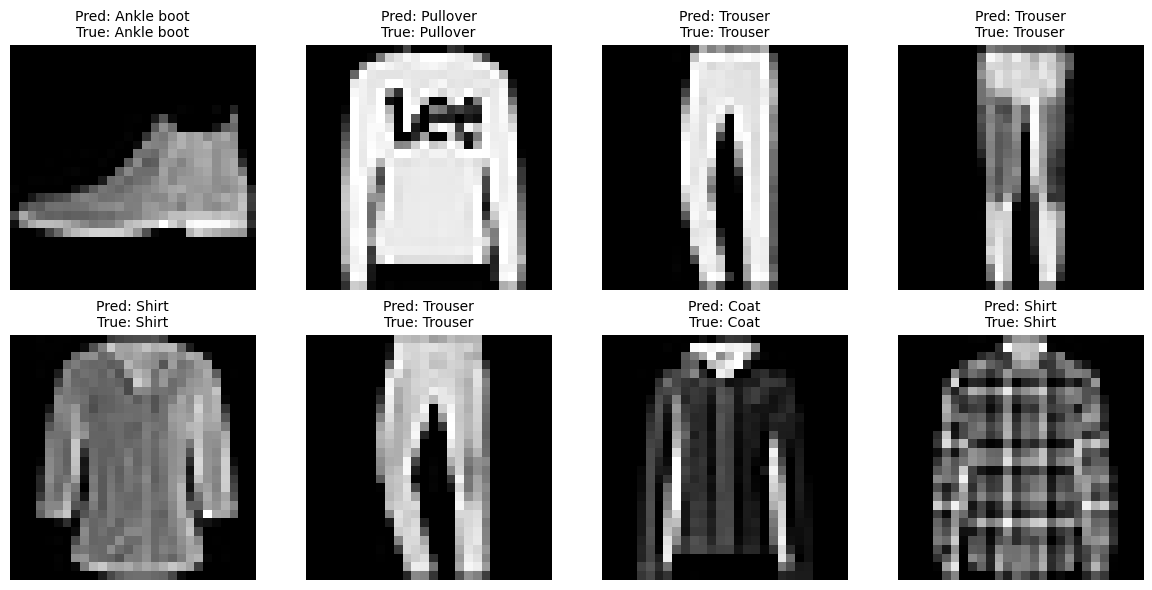

In [56]:
import matplotlib.pyplot as plt
import os

# images klasörü yoksa oluştur (zaten varsa sorun olmaz)
os.makedirs("images", exist_ok=True)

classes = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

model.eval()

images, labels = next(iter(test_loader))
images = images.to(device)
labels = labels.to(device)

with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)

# matplotlib CPU ister
images = images.cpu()
labels = labels.cpu()
preds = preds.cpu()

plt.figure(figsize=(12, 6))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(
        f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}",
        fontsize=10
    )
    plt.axis("off")

plt.tight_layout(pad=1.2)

plt.savefig("images/sample_predictions.png")

plt.show()


In [35]:
import torch
import torch.nn as nn
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cpu


In [36]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionMNIST(root="../data", train=True, download=True, transform=transform)
test_dataset  = FashionMNIST(root="../data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Train:", len(train_dataset), "Test:", len(test_dataset))


Train: 60000 Test: 10000


In [37]:
class CNNFashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.relu  = nn.ReLU()

        self.fc1   = nn.Linear(64 * 7 * 7, 128)
        self.fc2   = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # 28 -> 14
        x = self.pool(self.relu(self.conv2(x)))  # 14 -> 7
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        return self.fc2(x)


In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


def train_one_epoch(model, loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(loader)
    acc = 100 * correct / total
    return avg_loss, acc


@torch.no_grad()
def evaluate(model, loader):
    model.eval()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        running_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / len(loader)
    acc = 100 * correct / total
    return avg_loss, acc


In [39]:
num_epochs = 3

train_losses, train_accs = [], []
test_losses,  test_accs  = [], []

for epoch in range(num_epochs):
    tr_loss, tr_acc = train_one_epoch(model, train_loader)
    te_loss, te_acc = evaluate(model, test_loader)

    train_losses.append(tr_loss)
    train_accs.append(tr_acc)
    test_losses.append(te_loss)
    test_accs.append(te_acc)

    print(
        f"Epoch {epoch+1}/{num_epochs} | "
        f"Train Loss: {tr_loss:.4f} Acc: {tr_acc:.2f}% | "
        f"Test Loss: {te_loss:.4f} Acc: {te_acc:.2f}%"
    )


Epoch 1/3 | Train Loss: 0.1639 Acc: 93.95% | Test Loss: 0.2616 Acc: 90.89%
Epoch 2/3 | Train Loss: 0.1291 Acc: 95.27% | Test Loss: 0.2455 Acc: 91.86%
Epoch 3/3 | Train Loss: 0.1093 Acc: 96.00% | Test Loss: 0.2534 Acc: 91.49%


In [41]:
@torch.no_grad()
def get_all_preds(model, loader):
    model.eval()
    all_preds, all_labels = [], []

    for images, labels in loader:
        images = images.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu()

        all_preds.append(preds)
        all_labels.append(labels.cpu())  # 🔹 küçük ama önemli

    return torch.cat(all_preds), torch.cat(all_labels)


preds, labels = get_all_preds(model, test_loader)

num_classes = 10
cm = torch.zeros(num_classes, num_classes, dtype=torch.int64)

for t, p in zip(labels, preds):
    cm[t, p] += 1


Wrong samples: 851


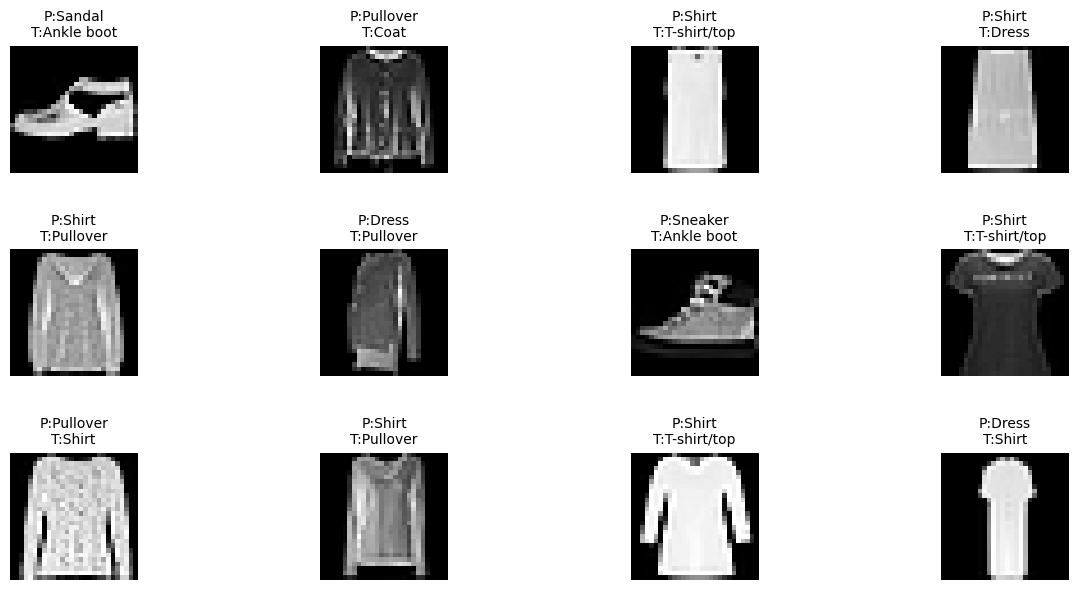

In [57]:
import matplotlib.pyplot as plt
import os

# images klasörü yoksa oluştur
os.makedirs("images", exist_ok=True)

classes = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

# yanlış tahminleri topla
wrong_imgs, wrong_true, wrong_pred = [], [], []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.to(device))
        preds = outputs.argmax(dim=1).cpu()

        wrong_mask = preds != labels
        if wrong_mask.any():
            wrong_imgs.append(images[wrong_mask])
            wrong_true.append(labels[wrong_mask])
            wrong_pred.append(preds[wrong_mask])

# tek tensor yap
wrong_imgs = torch.cat(wrong_imgs) if len(wrong_imgs) else torch.empty(0)
wrong_true = torch.cat(wrong_true) if len(wrong_true) else torch.empty(0, dtype=torch.long)
wrong_pred = torch.cat(wrong_pred) if len(wrong_pred) else torch.empty(0, dtype=torch.long)

print("Wrong samples:", len(wrong_imgs))

# 12 tane göster
n = min(12, len(wrong_imgs))
plt.figure(figsize=(12,6))

for i in range(n):
    plt.subplot(3, 4, i+1)
    plt.imshow(wrong_imgs[i].squeeze(), cmap="gray")
    plt.title(
        f"P:{classes[wrong_pred[i]]}\nT:{classes[wrong_true[i]]}",
        fontsize=10
    )
    plt.axis("off")

plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.3)


plt.savefig("images/misclassified_samples.png")

plt.show()


In [43]:
import os

SAVE_DIR = "./outputs"
os.makedirs(SAVE_DIR, exist_ok=True)

MODEL_PATH = os.path.join(SAVE_DIR, "cnn_fashionmnist.pth")
torch.save(model.state_dict(), MODEL_PATH)

print(f"✅ Model kaydedildi → {MODEL_PATH}")


✅ Model kaydedildi → ./outputs\cnn_fashionmnist.pth


In [44]:
import torch
import torch.nn as nn


In [45]:
class CNNFashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.relu  = nn.ReLU()

        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))   # 28 -> 14
        x = self.pool(self.relu(self.conv2(x)))   # 14 -> 7
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        return self.fc2(x)


In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [47]:
path = "./outputs/cnn_fashionmnist.pth"  # kaydettiğimizle aynı olsun

model = CNNFashion().to(device)

state = torch.load(path, map_location=device)

# checkpoint dict içinde saklanmış olabilir
if isinstance(state, dict) and "state_dict" in state:
    state = state["state_dict"]
elif isinstance(state, dict) and "model_state_dict" in state:
    state = state["model_state_dict"]

# "module." prefix temizliği (DataParallel vs. için)
new_state = {k.replace("module.", ""): v for k, v in state.items()}

missing, unexpected = model.load_state_dict(new_state, strict=False)

model.eval()

print("✅ Yüklendi.")
print("Missing keys:", missing)
print("Unexpected keys:", unexpected)


✅ Yüklendi.
Missing keys: []
Unexpected keys: []


In [48]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = FashionMNIST(root="../data", train=True, download=True, transform=transform)
test_dataset  = FashionMNIST(root="../data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("OK loaders:", len(train_loader), len(test_loader))


OK loaders: 938 157


In [49]:
[x for x in globals().keys() if "loader" in x]


['__loader__', 'train_loader', 'test_loader']

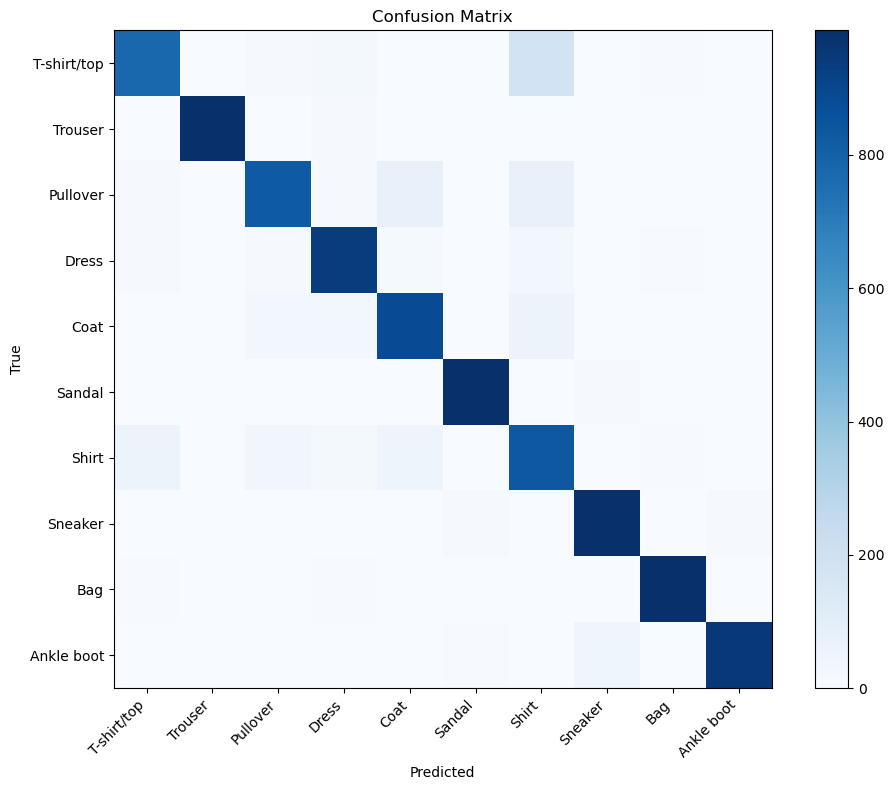

In [58]:
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

# images klasörü yoksa oluştur
os.makedirs("images", exist_ok=True)

classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(10), classes, rotation=45, ha="right")
plt.yticks(range(10), classes)
plt.colorbar()
plt.tight_layout()


plt.savefig("images/confusion_matrix.png")

plt.show()


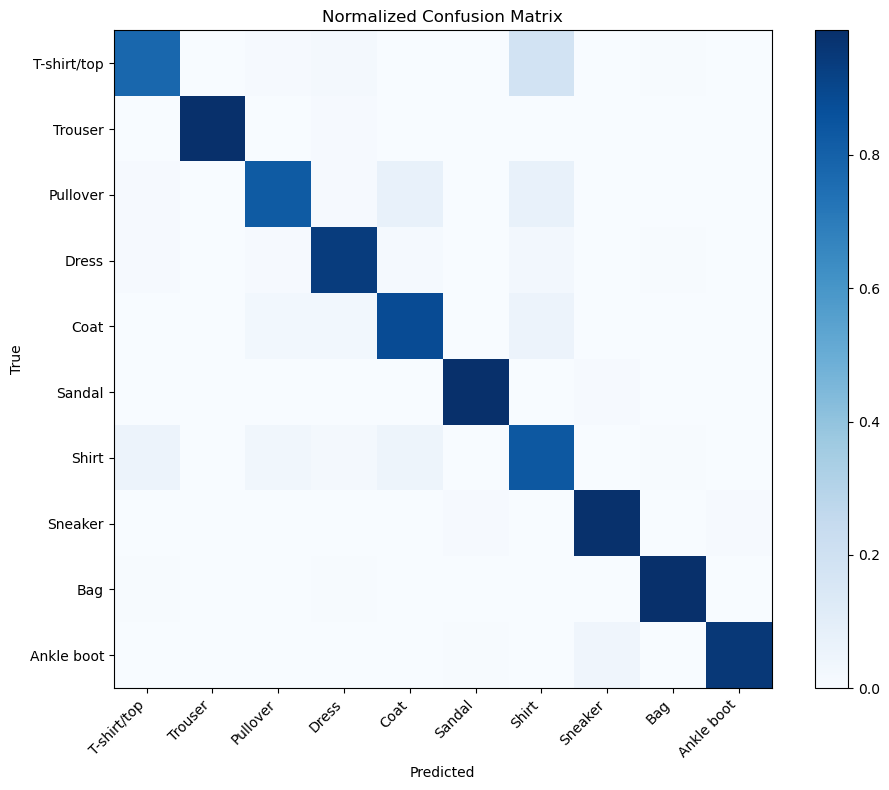

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

# images klasörü yoksa oluştur
os.makedirs("images", exist_ok=True)

# normalize (satır bazlı)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10, 8))
plt.imshow(cm_norm, cmap="Blues")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(range(10), classes, rotation=45, ha="right")
plt.yticks(range(10), classes)
plt.colorbar()
plt.tight_layout()

plt.savefig("images/confusion_matrix_normalized.png")

plt.show()


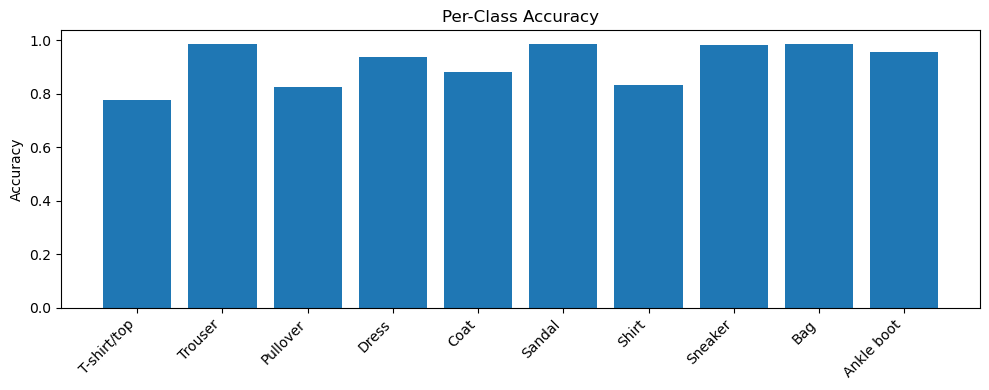

En düşük başarıya sahip sınıflar:
T-shirt/top -> 77.70%
Pullover -> 82.50%
Shirt -> 83.30%


In [60]:
import matplotlib.pyplot as plt
import os
import numpy as np

# images klasörü yoksa oluştur
os.makedirs("images", exist_ok=True)

per_class_acc = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(10, 4))
plt.bar(range(10), per_class_acc)
plt.xticks(range(10), classes, rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.tight_layout()


plt.savefig("images/per_class_accuracy.png")

plt.show()

# En kötü 3 sınıfı yazdır (bu kısım aynen kalıyor)
worst = np.argsort(per_class_acc)[:3]
print("En düşük başarıya sahip sınıflar:")
for i in worst:
    print(f"{classes[i]} -> {per_class_acc[i]*100:.2f}%")


In [53]:
from sklearn.metrics import classification_report

print(
    classification_report(
        all_labels,
        all_preds,
        target_names=classes,
        digits=3,
        zero_division=0
    )
)


              precision    recall  f1-score   support

 T-shirt/top      0.909     0.777     0.838      1000
     Trouser      0.995     0.986     0.990      1000
    Pullover      0.910     0.825     0.865      1000
       Dress      0.909     0.938     0.923      1000
        Coat      0.860     0.882     0.871      1000
      Sandal      0.984     0.987     0.986      1000
       Shirt      0.708     0.833     0.766      1000
     Sneaker      0.949     0.982     0.965      1000
         Bag      0.977     0.984     0.981      1000
  Ankle boot      0.987     0.955     0.971      1000

    accuracy                          0.915     10000
   macro avg      0.919     0.915     0.915     10000
weighted avg      0.919     0.915     0.915     10000



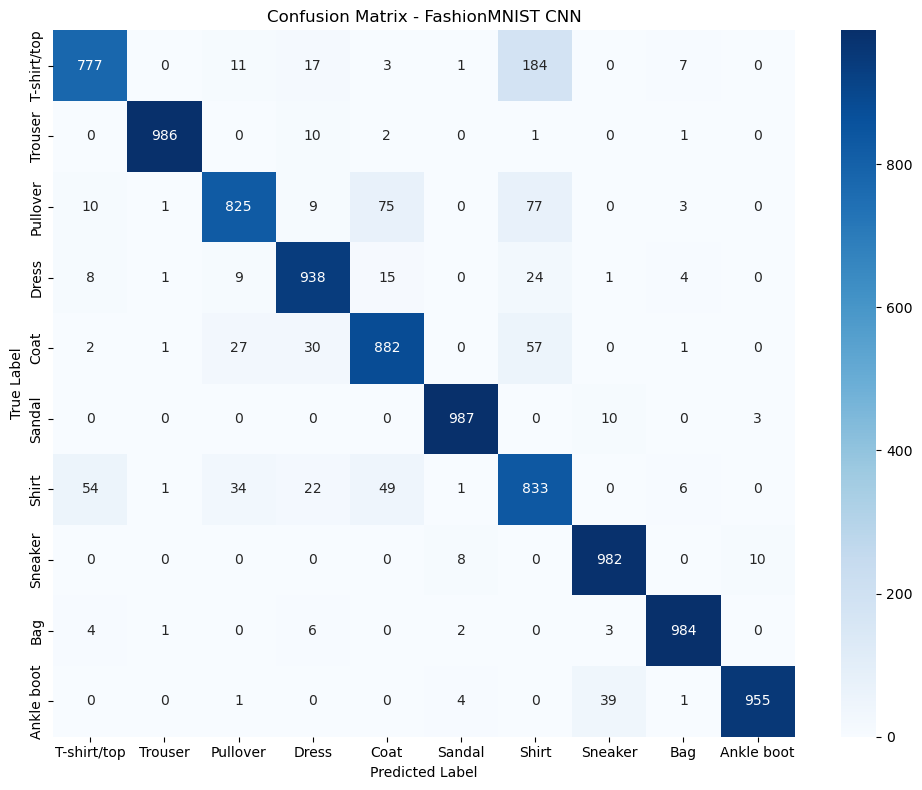

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

os.makedirs("images", exist_ok=True)

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - FashionMNIST CNN")

plt.tight_layout()
plt.savefig("images/confusion_matrix.png")
plt.show()


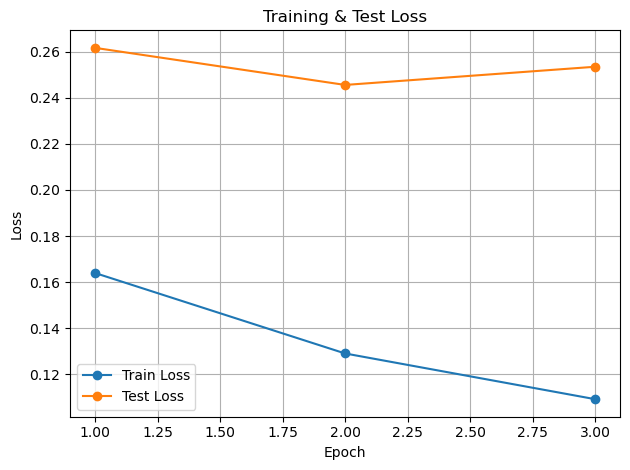

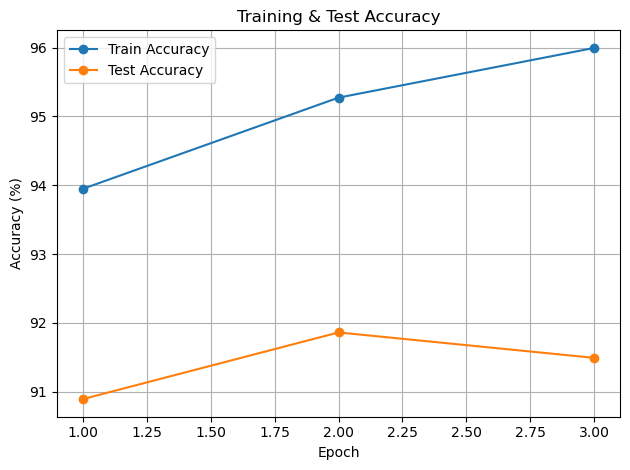

In [55]:
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)

epochs = range(1, len(train_losses) + 1)

# -------- LOSS GRAPH --------
plt.figure()
plt.plot(epochs, train_losses, marker='o', label="Train Loss")
plt.plot(epochs, test_losses, marker='o', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/loss.png")
plt.show()

# -------- ACCURACY GRAPH --------
plt.figure()
plt.plot(epochs, train_accs, marker='o', label="Train Accuracy")
plt.plot(epochs, test_accs, marker='o', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training & Test Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("images/accuracy.png")
plt.show()
